## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file_loc = 'C:/Users/kelvi/OneDrive/Documents/Data Projects/Data/credit/'
file_name ='POS_CASH_balance.csv'
data_name = 'POS_CASH_balance'
dict_loc = 'C:/Users/kelvi/OneDrive/Documents/Data Projects/Data/credit/HomeCredit_columns_description.csv'

## Load Data

In [4]:
df = pd.read_csv(file_loc + file_name)

In [5]:
df.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,10001358,1.000136e+07,1.000136e+07
unique,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9151119,NaN,NaN
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,NaN,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,NaN,0.000000e+00,0.000000e+00


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


## Load Data Dictionary

In [7]:
data_dictionary = pd.read_csv(dict_loc, engine='python')
data_dictionary[data_dictionary['Table']==file_name]

,Unnamed: 0,Table,Row,Description,Special
142,145,POS_CASH_balance.csv,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
144,147,POS_CASH_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
145,148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
146,149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
147,150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
148,151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previo...,NaN
149,152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,NaN


## Simple charts of each feature

SK_ID_PREV  -  936325  unique. Type =  int64
description not found


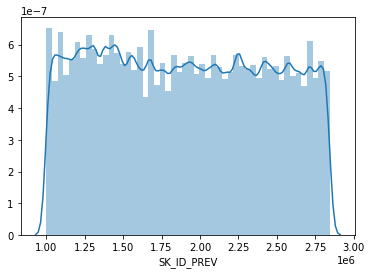

SK_ID_CURR  -  337252  unique. Type =  int64
ID of loan in our sample


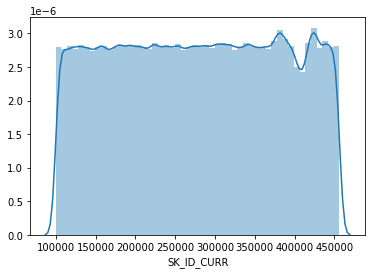

MONTHS_BALANCE  -  96  unique. Type =  int64
Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )


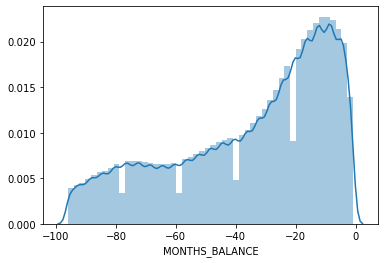

CNT_INSTALMENT  -  73  unique. Type =  float64
Term of previous credit (can change over time)


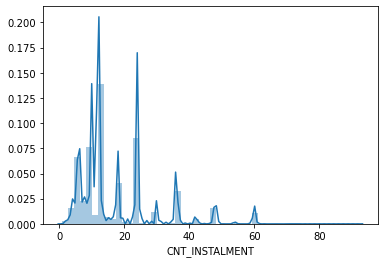

CNT_INSTALMENT_FUTURE  -  79  unique. Type =  float64
Installments left to pay on the previous credit


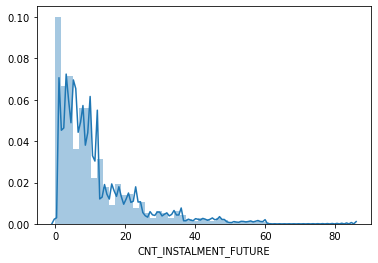

NAME_CONTRACT_STATUS  -  9  unique. Type =  object
Contract status during the month


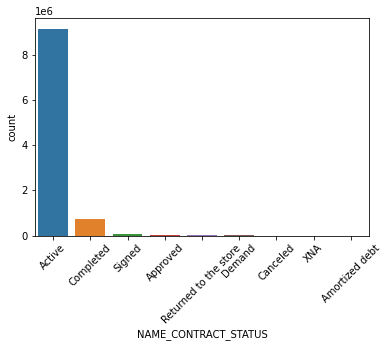

SK_DPD  -  3400  unique. Type =  int64
DPD (days past due) during the month of previous credit


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


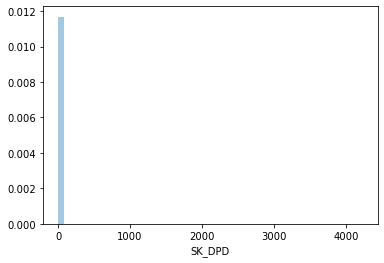

SK_DPD_DEF  -  2307  unique. Type =  int64
DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


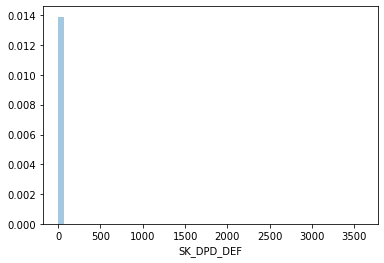

In [8]:
for column in df:
    print(column, " - ", df[column].nunique(), " unique. Type = ", df[column].dtype)
    try:
        print(data_dictionary.loc[(data_dictionary.Table==file_name) & (data_dictionary.Row==column)]['Description'].values[0])
    except:
        print("description not found")
    
    if df[column].dtype=='object':
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=45)
    elif df[column].dtype=='int64':
        if df[column].nunique() < 20:
            sns.countplot(data=df, x=column)
        else:
            sns.distplot(df[column])
    elif df[column].dtype=='float64':
        sns.distplot(df[column])
    plt.show()

## Null Value Analysis

In [9]:
df_null_values = df.isnull().sum()
df_only_null_values = df_null_values.loc[(df_null_values!=0)].to_frame().reset_index()
df_only_null_values.rename(columns={'index':'row', 0:'value'}, inplace=True)
df_only_null_values.sort_values(by='value',ascending=False)

,row,value
1,CNT_INSTALMENT_FUTURE,26087
0,CNT_INSTALMENT,26071


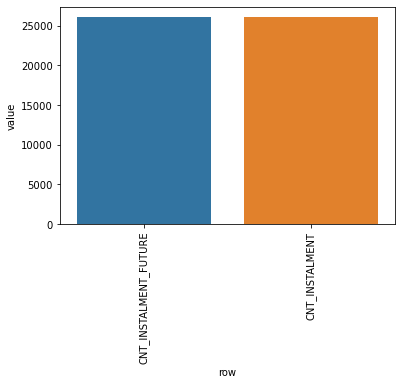

In [10]:
if df_only_null_values.size > 0:
    plot_order = df_only_null_values.sort_values(by='value', ascending=False).row.values
    sns.barplot(x='row', y='value', data=df_only_null_values, order=plot_order)
    plt.xticks(rotation=90)
    plt.show()

## Create an Output for univariate analysis

In [11]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(df)

#Saving results to HTML file
sweet_report.show_html('analysis ' + data_name + '.html')


Report analysis POS_CASH_balance.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Correlation Matrix

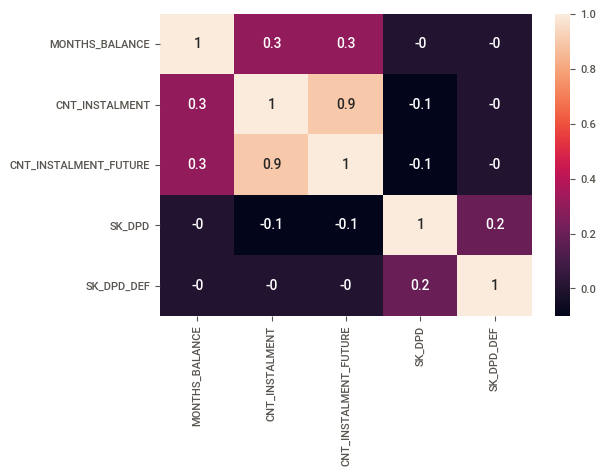

In [12]:
corrMatrix = df.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1).corr().round(1)
sns.heatmap(corrMatrix, annot=True)
plt.show()